### Import your librares

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Load your dataset

In [2]:
data = pd.read_csv("seattle_weather.csv")

In [28]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


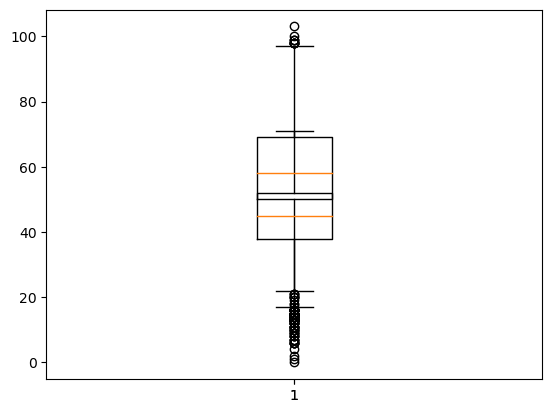

In [14]:
import matplotlib.pyplot as plt 

plt.boxplot(data["TMAX"])

plt.show()

second

In [22]:
import numpy as np

# assuming 'data' is your DataFrame and 'column_name' is the name of the column you want to check for outliers
q1 = data["TMAX"].quantile(0.25)
q3 = data["TMAX"].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
outliers = data[(data["TMAX"] < lower_limit) | (data["TMAX"] > upper_limit)]
print(outliers)

             DATE  PRCP  TMAX  TMIN   RAIN
743    1950-01-13  1.27    19    11   True
744    1950-01-14  0.16    16     8   True
745    1950-01-15  0.02    21    15   True
761    1950-01-31  0.00    20     0  False
1419   1951-11-20  0.08     4    39   True
2872   1955-11-12  0.00    21    13  False
4603   1960-08-08  0.00    98    66  False
4604   1960-08-09  0.00    99    59  False
6194   1964-12-16  0.00    20    10  False
7167   1967-08-16  0.00    98    59  False
7668   1968-12-29  0.00    17     8  False
7669   1968-12-30  0.15    18     6   True
11519  1979-07-16  0.00    98    63  False
12274  1981-08-09  0.00    99    68  False
12275  1981-08-10  0.00    98    67  False
14855  1988-09-02  0.00    98    59  False
15008  1989-02-02  0.01    18    11   True
15009  1989-02-03  0.00    20    10  False
15694  1990-12-20  0.00    21    14  False
15695  1990-12-21  0.00    20    12  False
15909  1991-07-23  0.00    99    65  False
17002  1994-07-20  0.00   100    65  False
21741  2007

In [23]:
# lower limit and upper limit are already calculated in step 2
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

Lower limit: 21.5
Upper limit: 97.5


In [26]:
# assuming 'data' is your DataFrame and 'column_name' is the name of the column you want to drop outliers from
data = data[(data["TMAX"] >= lower_limit) & (data["TMAX"] <= upper_limit)]

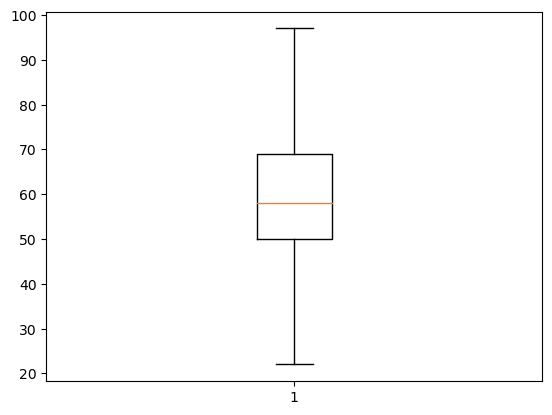

In [27]:
# assuming 'data' is your DataFrame and 'column_name' is the name of the column you want to visualize after processing
plt.boxplot(data["TMAX"])
plt.show()